In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#from scipy.stats import norm,t
from scipy.integrate import quad
import pandas as pd
import csv

%matplotlib inline


In [1]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

def percentile_below(z):
    return round(quad(normalProbabilityDensity, np.NINF, z)[0],4)

def percentile_between(a,b):
    return percentile_below(b)-percentile_below(a)

def percentile_above(z):
    return round(quad(normalProbabilityDensity, z,np.Inf)[0],4)

def draw_z_score(x, cond, mu, sigma, title):
    ''' draw Z score
    inputs:
        x: normal distribution distribution
        z : condition: x>1.12
        
    '''
    y = stats.norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()
    
def standardize(x,lst):
    return (x-np.mean(lst))/np.std(lst,ddof=0)

def z_score(x,mu,sigma):
    return (x-mu)/sigma

def standart_error(sigma,n):
    return sigma*(n**(-1/2))

def z_crit(tol):
    for x in range(1,10000,1):
        if percentile_between(-x*0.001,x*0.001)>=tol*0.01:
            crit=x*0.001
            break
    return crit
    
def confidence_interval_z(mean,SE,tol):
    print('conf interval : ',round(mean-(SE*z_crit(tol)),4),round(mean+(SE*z_crit(tol)),4))
    print('margin of error : ',round(-((mean-(SE*z_crit(tol)))-(mean+(SE*z_crit(tol))))/2,4))

def read_csv(filename):
    with open(filename) as f:
        list2 = [float(row.split(',')[0]) for row in f]
    return list2

def t_crit(p,dof,tails):  
    if tails == 2:
        #Studnt, n=999, p<0.05, 2-tail
        ts= stats.t.ppf(1-(p/2), dof)
    elif tails == 1:
        #Studnt, n=999, p<0.05%, Single tail
        ts = stats.t.ppf(1-p, dof)
    else:
        print('give Tail=1 or 2')      
    return ts

def find_p_from_t(dof,tails,t_sco):
    for p_m in range (1,100000,1):
        if round(t_crit(p_m*0.00001,dof,tails),3)==round(t_sco,3):
            print(round(p_m*0.00001,4))
            break
            
def degrees_of_freedom(n):
    return n-1

def standard_error_meam(sigma,n):
    return sigma*(n)**(-1/2)

def pooled_variance(sigma1,sigma2,n1,n2):
    return (((n1-1)*(sigma1**2))+((n2-1)*(sigma2**2)))/(n1+n2-2)

def standard_error_meam_independent(sigma1,sigma2,n1,n2):
    return (((sigma1**2)/n1)+((sigma2**2)/(n2)))**(1/2)

def t_score(x,mu,sem):
    return (x-mu)/(sem)

def cohen_d(x,mu,s):
    return (x-mu)/(s)

def margin_of_error(tcrit,sem):
    return tcrit*sem

def r_squared(t,dof):
    return (t**2)/((t**2)+(dof))

def confidence_interval_t(x,moe):
    return(x-moe,x+moe)

(array([ 295.,  537.,  810., 1125., 1438., 1711., 1376., 1074.,  842.,
         542.,  250.]),
 array([0.5       , 1.04545455, 1.59090909, 2.13636364, 2.68181818,
        3.22727273, 3.77272727, 4.31818182, 4.86363636, 5.40909091,
        5.95454545, 6.5       ]),
 <a list of 11 Patch objects>)

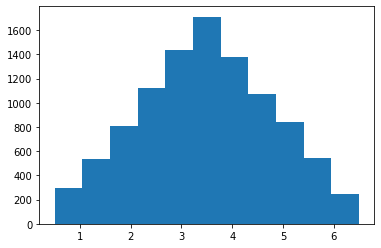

In [37]:
number_of_dice_faces=6
number_of_rolls=10000
dice1 = np.random.randint(1,number_of_dice_faces+1,number_of_rolls)
dice2 = np.random.randint(1,number_of_dice_faces+1,number_of_rolls)

average = (dice1+dice2)/2
plt.hist(average, bins=11, range=(0.5,6.5))
#print(rolls,average)



z down = 1.25 :  0.8944
z  up = 1 :  0.1587
a and b  [-3,3] :  0.9974000000000001


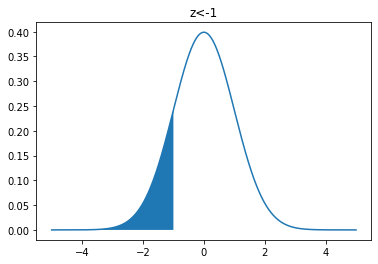

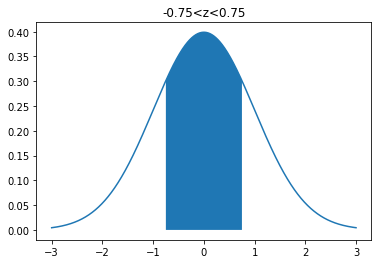

In [38]:
# examples of the here above functions
print('z down = 1.25 : ', percentile_below(1.25))
print('z  up = 1 : ', percentile_above(1))
print('a and b  [-3,3] : ', percentile_between(-3,3))

x = np.arange(-5,5,0.001)
z0 = -1
draw_z_score(x, x<z0, 0, 1, 'z<-1')

x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')

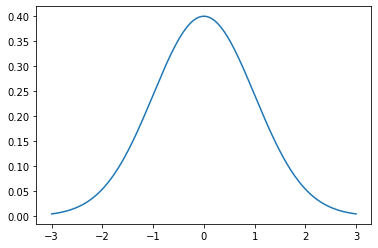

In [39]:
rng = np.arange(-3,3,0.001)
normal_pdf = stats.norm.pdf(rng, 0, 1)
plt.plot(rng, normal_pdf)
plt.show()

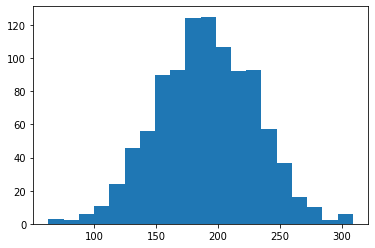

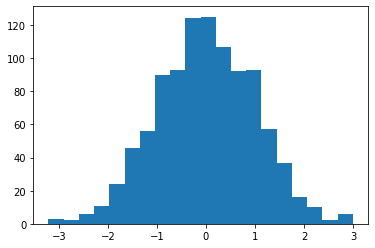

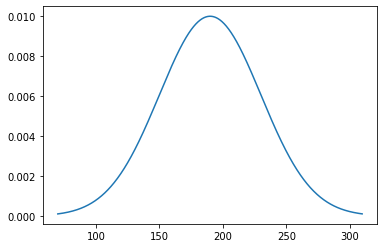

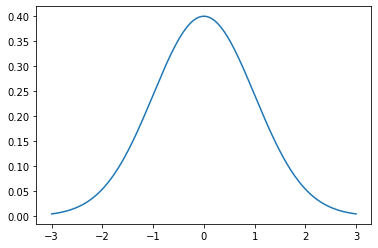

In [40]:
mean,std,n=190,40,1000
range_a=np.arange((mean-3*std),mean+3*std,(6*std)/n)
range_b=np.arange(-3,3,1/n)
a = np.random.normal(loc = mean, scale = std, size = n) 
b = (a-a.mean())/a.std()
c = stats.norm.pdf(range_a,mean,std) 
d = stats.norm.pdf(range_b,0,1) 
len(range_a)

plt.hist(a, bins=20)
plt.show()

plt.hist(b, bins=20)
plt.show()

plt.plot(range_a,c)
plt.show()

plt.plot(range_b,d)
plt.show()

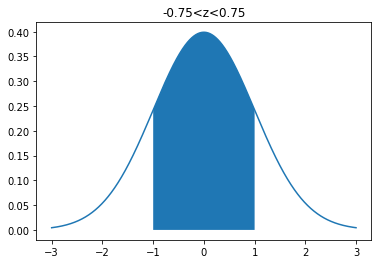

68.26

In [41]:
x = np.arange(-3,3,0.001)
z0 = 1
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')
percentile_between(-1,1)*100

In [42]:
karmapoint = read_csv('Karma points per post (Lesson 6) - Sheet1.csv')

In [43]:
mean=round(np.mean(karmapoint),1)
std=round(np.std(karmapoint,ddof=0),1)
n=len(karmapoint)

In [44]:
print(mean,std,n)

13.0 4.7 200


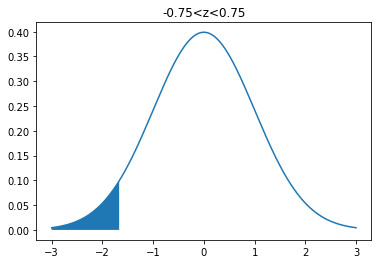

0.0475

In [45]:
x = np.arange(-3,3,0.001)
z0 = round(standardize(5,karmapoint),2)+0.01
draw_z_score(x, x < z0, 0, 1, '-0.75<z<0.75')
percentile_below(z0)

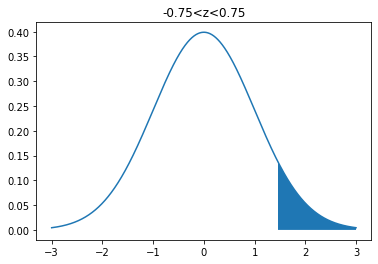

0.0721

In [46]:
x = np.arange(-3,3,0.001)
z0 = round(standardize(20,karmapoint),2)-0.02
draw_z_score(x, x > z0, 0, 1, '-0.75<z<0.75')
percentile_above(z0)

In [47]:
percentile_between(round(standardize(10,karmapoint),2),round(standardize(16,karmapoint),2))

0.4713

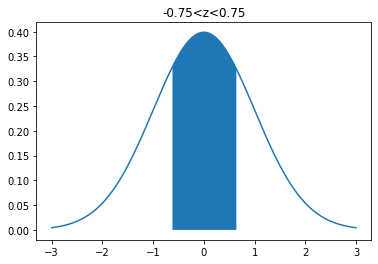

0.4713

In [48]:
x = np.arange(-3,3,0.001)
z0 = round(standardize(10,karmapoint),2)
z1 = round(standardize(16,karmapoint),2)
draw_z_score(x, (z0 < x) & (x < z1), 0, 1, '-0.75<z<0.75')
percentile_between(z0,z1)

In [49]:
for x in range(100,200,1):
    if percentile_above(x*0.01)<=0.05:
        print(x*0.01)
        break

1.6500000000000001


In [50]:
kscores=pd.read_csv('Sampling Distributions - Lesson 7 (Responses) - Form Responses.csv') 
kscores.head()

,Timestamp,What Klout score did you choose? (n=1),What is the average Klout score? (n=5),What is the average Klout score? (n=10)
0,3/13/2013 3:18:11,52.7051741,33.50304859,44.91469959
1,3/13/2013 10:13:38,10,45.94,49.33
2,3/13/2013 10:56:51,45.23071077,30.99971352,40.63249312
3,3/13/2013 11:24:03,13.46,32.51,38.94
4,3/13/2013 15:03:59,45.23071077,32.94917032,36.40165489


In [51]:
kscores['What Klout score did you choose? (n=1)'] = pd.to_numeric(kscores['What Klout score did you choose? (n=1)'],errors='coerce')
kscores['What is the average Klout score? (n=5)'] = pd.to_numeric(kscores['What is the average Klout score? (n=5)'],errors='coerce')
kscores['What is the average Klout score? (n=10)'] = pd.to_numeric(kscores['What is the average Klout score? (n=10)'],errors='coerce')
kscores.columns = ['Timestamp', '1n', '5n', '10n']

In [52]:
kscores.head(220).describe()

,1n,5n,10n
count,219.000000,217.000000,2.160000e+02
mean,39.405519,37.524298,1.947150e+11
std,37.529306,8.823088,2.861715e+12
min,1.000000,3.000000,3.660345e+00
25%,22.987486,32.841362,3.382556e+01
50%,38.645528,38.572836,3.786049e+01
75%,51.518017,42.600000,4.163897e+01
max,537.000000,74.320000,4.205845e+13


In [53]:
kscores['1n']=kscores['1n'][(kscores['1n']<100) & (kscores['1n']>0)]
kscores['5n']=kscores['5n'][(kscores['5n']<100) & (kscores['5n']>0) ]
kscores['10n']=kscores['10n'][(kscores['10n']<100) & (kscores['10n']>0) ]

In [54]:
kscores.describe()

,1n,5n,10n
count,13099.000000,12826.000000,12741.000000
mean,36.859096,37.141613,37.350856
std,16.543376,7.855299,6.691925
min,0.022365,0.082800,0.050000
25%,22.630000,32.522500,33.964291
50%,39.929773,36.741698,37.826618
75%,50.742387,42.125804,40.812928
max,99.000000,98.000000,99.000000


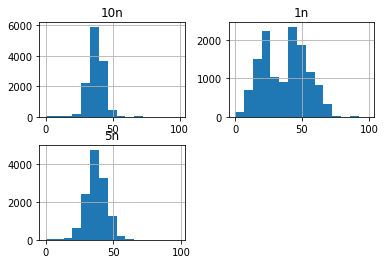

In [55]:
kscores.hist(bins=15)
plt.show()

In [56]:
for x in range(1000,3000,1):
    if percentile_between(-x*0.001,x*0.001)>=0.98:
        print(x*0.0010)
        break

2.325


In [57]:
er = read_csv('Engagement ratio - Lesson 8 - Sheet1.csv')

In [58]:
mu=np.mean(er)
sigma=np.std(er,ddof=0)
SE=standart_error(sigma,20)
print(round(mu,3),round(sigma,3),round(SE,3))
confidence_interval_z(0.13,SE,95)

0.077 0.107 0.024
conf interval :  0.083 0.177
margin of error :  0.047


In [61]:
mu=180
x=175
sigma=18
n=9
zcrit=z_crit(99)
SE=standart_error(sigma,n)
z=z_score(x,mu,SE)


In [63]:
print(zcrit,SE)
confidence_interval_z(x,SE,99)

2.573 6.0
conf interval :  159.562 190.438
margin of error :  15.438


In [64]:
percentile_below(z)

0.2023

In [65]:
(190.438-159.562)/2

15.437999999999988

In [66]:
z_crit(95)

1.961

In [67]:
for x in range(1,6000,1):
    if percentile_below(x*0.001)>=0.92:
        print(x*0.0010)
        break

1.405


In [68]:
SE=standart_error(0.64,20)
z_score(7.13,7.5,SE)

-2.5854535989841323

In [70]:
z_crit(99.9)

3.2640000000000002

In [71]:
scores=pd.read_csv('Engagement and Learning Results - Lesson 9 - Sheet1.csv') 
scores.columns = ['Timestamp', 'engagement', 'learning ','1','2',3]
scores.head()

,Timestamp,engagement,learning,1,2,3
0,3/14/2013 18:42:17,10.0,10.0,7.470213,6.4,1368.30000
1,3/14/2013 18:42:44,10.0,10.0,NaN,6.4,2.41814
2,3/14/2013 18:42:58,7.0,8.0,NaN,0.2,NaN
3,3/14/2013 18:43:15,8.0,9.0,NaN,0.3,NaN
4,3/14/2013 18:43:27,9.0,9.0,NaN,2.3,NaN


In [72]:
mu=scores['engagement'].mean()
sigma=scores['engagement'].std(ddof=0)
print(mu,sigma)

7.470212765957447 2.412989220035441


In [74]:
z_crit(95)

1.961

In [75]:
SE=standart_error(2.41,50)
z_score(8.3,7.47,SE)

2.4352640181943364

In [76]:
z_score(8.3,7.47,SE)

2.4352640181943364

In [78]:
z_crit(95)

1.961

In [79]:
SE=standart_error(6,36)

In [80]:
SE

1.0

In [82]:
mu=7895
sigma=230
x=9640
n=5
SE=standart_error(sigma,n)
z=z_score(x,mu,SE)
print(SE,z)
confidence_interval_z(x,SE,99)

102.85912696499032 16.964950524944058
conf interval :  9375.3435 9904.6565
margin of error :  264.6565


In [83]:
mu=45
sigma=14
x=42
n=16
SE=standart_error(sigma,n)
confidence_interval_z(x,SE,95)
z=z_score(x,mu,SE)
print(SE,z)

conf interval :  35.1365 48.8635
margin of error :  6.8635
3.5 -0.8571428571428571


In [84]:
round(t_crit(0.025,3,1),3)

3.182

In [89]:
find_p_from_t(3,1,3.182)

0.025


In [90]:
round(t_crit(0.25,24,1),3)

0.685

In [91]:
find_p_from_t(24,1,0.685)

0.2498


In [92]:
bw = read_csv('Finches - Lesson 10 - Sheet1.csv')

In [94]:
mu=6.07
n=len(bw)
mean=np.mean(bw)
sig=np.std(bw,ddof=1)
t=t_score(mean,mu,sig)
print(n,mean,sig,t)

500 6.469600000000001 0.3961182390633348 1.0087897011379698


In [95]:
print(t)

1.0087897011379698


In [96]:
lst=[5,19,11,23,12,7,3,21]
mu=10
n=len(lst)
mean=np.mean(lst)
sig=np.std(lst,ddof=1)
s=(((sig*sig)*n)/(n-1))**(1/2)
t=t_score(mean,mu,sig)
print(n,mean,s,sig,round(t,3))

8 12.625 8.120269423498465 7.595816517756901 0.346


In [97]:
find_p_from_t(8,2,0.977)

0.357


In [98]:
t_crit(0.3609,8,2)

0.9690519356569852

In [99]:
for p_m in range (1,100000,1):
    if round(t_crit(p_m*0.00001,8,2),3)==0.977:
        print(round(p_m*0.00001,4))
        break

0.357


In [101]:
mu=1830
n=100
mean=1700
sig=200
s=standard_error_meam(sig,n)
t=t_score(mean,mu,s)
d=cohen_d(mean,mu,sig)
print(n,mean,s,sig,round(t,3),d)

100 1700 20.0 200 -6.5 -0.65


In [102]:
tcrit=t_crit(0.05,25,2)

In [103]:
moe=margin_of_error(tcrit,s)
confidence_interval_t(mean,moe)

(1658.8092289449341, 1741.1907710550659)

In [104]:
tcrit=t_crit(0.05,100,2)

In [105]:
moe=margin_of_error(tcrit,s)
confidence_interval_t(mean,moe)

(1660.3205696310074, 1739.6794303689926)

In [106]:
keybord=pd.read_csv('Keyboards - Lesson 10 - Sheet1.csv')

In [107]:
keybord.columns = ['qwerty', 'alphab']
keybord.head()

,qwerty,alphab
0,6,6
1,6,11
2,2,8
3,7,5
4,8,11


In [109]:
mean_q=keybord.qwerty.mean()
mean_a=keybord.alphab.mean()
std_q=keybord.qwerty.std(ddof=0)
std_a=keybord.alphab.std(ddof=0)
n=len(keybord)
C=np.std(keybord.qwerty-keybord.alphab,ddof=1)
SE=standard_error_meam(s,n)
t=t_score(mean_q,mean_a,SE)
print('n : ',n ,'\ns : ',round(s,3),'\nt : ',round(t,3),'\nqwerty : ',round(mean_q,3),round(std_q,3),'\nalphab : ',round(mean_a,3),round(std_a,3))

n :  25 
s :  20.0 
t :  -0.68 
qwerty :  5.08 2.018 
alphab :  7.8 2.592


In [111]:
tcrit=t_crit(0.05,n,2)
print(tcrit,SE)

2.059538552753294 4.0


In [112]:
cohen_d(mean_q,mean_a,s)

-0.13599999999999998

In [113]:
moe=margin_of_error(tcrit,SE)
confidence_interval_t(mean_q-mean_a,moe)

(-10.958154211013177, 5.518154211013177)

In [115]:
r_squared(2,21)

0.16

In [145]:
# full t-test example as in the study for dependent sample
mu=151
sigma=50
#H0 : X=>151
#Ha : X<151
#-> one tail test in negative direction
n=25
dof=degrees_of_freedom(25)
tcrit=-t_crit(0.05,dof,1) #because of direction 
sem=standard_error_meam(sigma,n)
x=126
t=t_score(x,mu,sem)
d=cohen_d(x,mu,sigma)
r_2=r_squared(t,dof)
moe=margin_of_error(t_crit(0.05,dof,2),sem)
ci=confidence_interval_t(x,moe)


In [146]:
print(
    'dof:',dof,
    '\ntcrit : ',round(tcrit,3),
    '\nsem : ',round(sem,2),
    '\nmean_diff : ',round(x-mu,2),
    '\nt_score : ',round(t,2),
    '\ncohen_d : ',round(d,2),
    '\nr² : ',round(r_2,2),
    '\nMoE : ',round(moe,2),
    '\nCI : (',round(ci[0],2),'-', round(ci[1],2) ,')'
     )

dof: 24 
tcrit :  -1.711 
sem :  10.0 
mean_diff :  -25 
t_score :  -2.5 
cohen_d :  -0.5 
r² :  0.21 
MoE :  20.64 
CI : ( 105.36 - 146.64 )


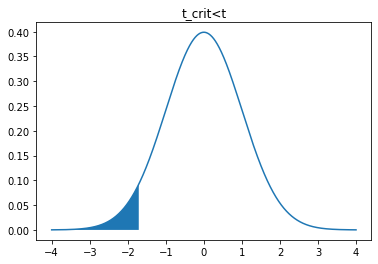

t=-2.5 < tcrit=-1.711


In [147]:
y = np.arange(-4,4,0.001)
draw_z_score(y, (tcrit  > y) , 0, 1, 't_crit<t')
print('t=-2.5 < tcrit=-1.711')

In [148]:
find_p_from_t(dof,1,-t)

0.0098


In [120]:
p=0.01
#So the result are statistically significcant (p<alpha=0.05)

In [194]:
# full t-test example as in the study for dependent sample
mu=12
sigma=2.7
mu2=3
sigma2=1.2
#H0 : mu-mu2=0
#Ha : mu-mu2>0
#-> one tail test in positive direction
n=1000
dof=degrees_of_freedom(n)
tcrit=t_crit(0.05,dof,1) #because of positive direction 
x=mu-mu2
s=(sigma**2+sigma2**2)**(1/2)
sem=standard_error_meam(s,n)
t=t_score(mu,mu2,sem)
d=cohen_d(mu,mu2,s)
r_2=r_squared(t,dof)
moe=margin_of_error(t_crit(0.05,dof,2),sem)
ci=confidence_interval_t(x,moe)


In [195]:
print(
    'dof:',dof,
    '\ntcrit : ',round(tcrit,3),
    '\nx : ',round(x,2),
    '\ns : ',round(s,2),    
    '\nsem : ',round(sem,2),
    '\nt_score : ',round(t,2),
    '\ncohen_d : ',round(d,2),
    '\nr² : ',round(r_2,2),
    '\nMoE : ',round(moe,2),
    '\nCI : (',round(ci[0],2),'-', round(ci[1],2) ,')'
     )

dof: 999 
tcrit :  1.646 
x :  9 
s :  2.95 
sem :  0.09 
t_score :  96.32 
cohen_d :  3.05 
r² :  0.9 
MoE :  0.18 
CI : ( 8.82 - 9.18 )


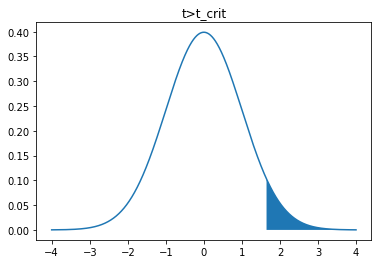

tcrit=1.646 > t=96.321


In [196]:
y = np.arange(-4,4,0.001)
draw_z_score(y, (tcrit  < y) , 0, 1, 't>t_crit')
print('tcrit=1.646 > t=96.321')

In [197]:
find_p_from_t(dof,1,0.25)

0.4011


In [198]:
# full t-test example as in the study for dependent sample
mu=7.8
#sigma=2.7
mu2=4.8
#sigma2=1.2
x=mu2-mu
s=1.33
#s=(sigma**2+sigma2**2)**(1/2)
#H0 : mu2-mu=0
#Ha : mu2-mu<0
#-> one tail test in negative direction
n=10
dof=degrees_of_freedom(n)
tcrit=-t_crit(0.05,dof,1) #because of negative direction 
sem=standard_error_meam(s,n)
t=t_score(mu2,mu,sem)
d=cohen_d(mu2,mu,s)
r_2=r_squared(t,dof)
moe=margin_of_error(t_crit(0.05,dof,2),sem)
ci=confidence_interval_t(x,moe)

In [199]:
print(
    'dof:',dof,
    '\ntcrit : ',round(tcrit,3),
    '\nx : ',round(x,2),
    '\ns : ',round(s,2),    
    '\nsem : ',round(sem,2),
    '\nt_score : ',round(t,2),
    '\ncohen_d : ',round(d,2),
    '\nr² : ',round(r_2,2),
    '\nMoE : ',round(moe,2),
    '\nCI : (',round(ci[0],2),'-', round(ci[1],2) ,')'
     )

dof: 9 
tcrit :  -1.833 
x :  -3.0 
s :  1.33 
sem :  0.42 
t_score :  -7.13 
cohen_d :  -2.26 
r² :  0.85 
MoE :  0.95 
CI : ( -3.95 - -2.05 )


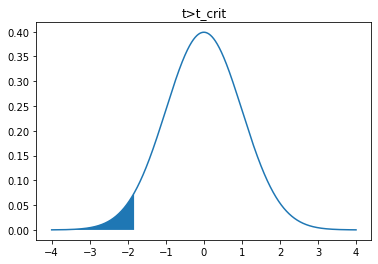

tcrit=-1.833  > t=-7.13


In [200]:
y = np.arange(-4,4,0.001)
draw_z_score(y, (tcrit  > y) , 0, 1, 't>t_crit')
print('tcrit=-1.833  > t=-7.13')

In [224]:
foodp=pd.read_csv('Food Prices - Lesson 11 - Sheet1.csv')
foodp.columns = ['Gettysburg', 'Wilma']

In [225]:
foodp.head()

,Gettysburg,Wilma
0,9,11.0
1,5,10.0
2,6,12.0
3,11,9.0
4,8,8.0


In [226]:
foodp['Gettysburg'].count()

18

In [238]:
# full t-test example as in the study for independent sample
n1=foodp['Gettysburg'].count()
mu1=foodp['Gettysburg'].mean()
sigma1=foodp['Gettysburg'].std(ddof=1) #bessel's correction apply Since they are samples
n2=foodp['Wilma'].count()
mu2=foodp['Wilma'].mean()
sigma2=foodp['Wilma'].std(ddof=1) #bessel's correction apply Since they are samples
x=mu2-mu1
s=(sigma1**2+sigma2**2)**(1/2)
#H0 : mu=mu2
#Ha : mu<>mu2
#-> 2 tail test -> no direction
dof=degrees_of_freedom(n1+n2-1)
tcrit=t_crit(0.05,dof,2) #because of negative direction 
sem=standard_error_meam_independent(sigma1,sigma2,n1,n2)
t=t_score(mu1,mu2,sem)
d=cohen_d(mu1,mu2,s)
r_2=r_squared(t,dof)
moe=margin_of_error(t_crit(0.05,dof,2),sem)
ci=confidence_interval_t(x,moe)
print(
    'n1, n2',(n1,n2),
    '\nmu1 mu2',(round(mu1,2),round(mu2,2)),
    '\ns1 s2',(round(sigma1,2),round(sigma2,2)),
    '\ndof:',dof,
    '\ntcrit : ',round(tcrit,3),
    '\nsem : ',round(sem,2),
    '\nmean_diff : ',round(mu1-mu2,2),
    '\nt_score : ',round(t,2),
    '\ncohen_d : ',round(d,2),
    '\nr² : ',round(r_2,2),
    '\nMoE : ',round(moe,2),
    '\nCI : (',round(ci[0],2),'-', round(ci[1],2) ,')'
     )

n1, n2 (18, 14) 
mu1 mu2 (8.94, 11.14) 
s1 s2 (2.65, 2.18) 
dof: 30 
tcrit :  2.042 
sem :  0.85 
mean_diff :  -2.2 
t_score :  -2.58 
cohen_d :  -0.64 
r² :  0.18 
MoE :  1.74 
CI : ( 0.46 - 3.94 )


In [242]:
find_p_from_t(dof,2,-t) #because only value possible for t are positive in the function

0.0151


In [315]:
# full t-test example as in the study for independent sample
sample1=[40,36,20,32,45,28]
n1=6
mu1=np.mean(sample1)
sigma1=np.std(sample1,ddof=1) #bessel's correction apply Since they are samples
sample2=[41,39,18,23,35]
n2=5
mu2=np.mean(sample2)
sigma2=np.std(sample2,ddof=1) #bessel's correction apply Since they are samples
x=mu2-mu1
s=(sigma1**2+sigma2**2)**(1/2)
#H0 : mu=mu2
#Ha : mu<>mu2
#-> 2 tail test -> no direction
dof=degrees_of_freedom(n1+n2-1)
tcrit=t_crit(0.05,dof,2) #because of negative direction 
sem=standard_error_meam_independent(sigma1,sigma2,n1,n2)
t=t_score(mu1,mu2,sem)
p=stats.ttest_ind(sample1,sample2,axis=0, equal_var=False)[1]
d=cohen_d(mu1,mu2,s)
r_2=r_squared(t,dof)
moe=margin_of_error(t_crit(0.05,dof,2),sem)
ci=confidence_interval_t(x,moe)
print(
    'n1, n2',(n1,n2),
    '\nmu1 mu2',(round(mu1,2),round(mu2,2)),
    '\ns1 s2',(round(sigma1,2),round(sigma2,2)),
    '\ndof:',dof,
    '\nt_score : ',round(p,2),
    '\np : ',round(t,2),
    '\ntcrit : ',round(tcrit,3),
    '\nsem : ',round(sem,2),
    '\nmean_diff : ',round(mu1-mu2,2),
    '\ncohen_d : ',round(d,2),
    '\nr² : ',round(r_2,2),
    '\nMoE : ',round(moe,2),
    '\nCI : (',round(ci[0],2),'-', round(ci[1],2) ,')'
     )

n1, n2 (6, 5) 
mu1 mu2 (33.5, 31.2) 
s1 s2 (8.89, 10.16) 
dof: 9 
t_score :  0.7 
p :  0.4 
tcrit :  2.262 
sem :  5.82 
mean_diff :  2.3 
cohen_d :  0.17 
r² :  0.02 
MoE :  13.16 
CI : ( -15.46 - 10.86 )


In [314]:
find_p_from_t(dof,2,t)
print(t)

0.7017
0.3954755449732927


In [312]:
stats.ttest_ind(sample1,sample2,axis=0, equal_var=False)

Ttest_indResult(statistic=0.3954755449732927, pvalue=0.7027055505410766)

In [316]:
# full t-test example as in the study for independent sample
sample1=[90,28,30,10,5,9,60]
n1=len(sample1)
mu1=np.mean(sample1)
sigma1=np.std(sample1,ddof=1) #bessel's correction apply Since they are samples
sample2=[4,120,5,3,10,3,5,13,4,10,21]
n2=len(sample2)
mu2=np.mean(sample2)
sigma2=np.std(sample2,ddof=1) #bessel's correction apply Since they are samples
x=mu1-mu2
s=(sigma1**2+sigma2**2)**(1/2)
#H0 : mu=mu2
#Ha : mu<>mu2
#-> 2 tail test -> no direction
dof=degrees_of_freedom(n1+n2-1)
tcrit=t_crit(0.05,dof,2) #because of negative direction 
sem=standard_error_meam_independent(sigma1,sigma2,n1,n2)
t=t_score(mu1,mu2,sem)
p=stats.ttest_ind(sample1,sample2,axis=0, equal_var=False)[1]
d=cohen_d(mu1,mu2,s)
r_2=r_squared(t,dof)
moe=margin_of_error(t_crit(0.05,dof,2),sem)
ci=confidence_interval_t(x,moe)
print(
    'n1, n2',(n1,n2),
    '\nmu1 mu2',(round(mu1,2),round(mu2,2)),
    '\ns1 s2',(round(sigma1,2),round(sigma2,2)),
    '\ndof:',dof,
    '\nt_score : ',round(p,2),
    '\np : ',round(t,2),
    '\ntcrit : ',round(tcrit,3),
    '\nsem : ',round(sem,2),
    '\nmean_diff : ',round(mu1-mu2,2),
    '\ncohen_d : ',round(d,2),
    '\nr² : ',round(r_2,2),
    '\nMoE : ',round(moe,2),
    '\nCI : (',round(ci[0],2),'-', round(ci[1],2) ,')'
     )

n1, n2 (7, 11) 
mu1 mu2 (33.14, 18.0) 
s1 s2 (31.36, 34.27) 
dof: 16 
t_score :  0.35 
p :  0.96 
tcrit :  2.12 
sem :  15.73 
mean_diff :  15.14 
cohen_d :  0.33 
r² :  0.05 
MoE :  33.34 
CI : ( -18.19 - 48.48 )


In [306]:
find_p_from_t(dof,2,0.96)
print(t)

0.3511
0.9629743503795974


In [303]:
stats.ttest_ind([90,28,30,10,5,9,60],[4,120,5,3,10,3,5,13,4,10,21],axis=0, equal_var=False)

Ttest_indResult(statistic=0.9629743503795974, pvalue=0.3521290865809704)

In [359]:
# full t-test example as in the study for independent sample of different size
sample1=[5,6,1,-4]
n1=len(sample1)
mu1=np.mean(sample1)
sigma1=np.std(sample1,ddof=1) #bessel's correction apply Since they are samples
sample2=[3,7,8]
n2=len(sample2)
mu2=np.mean(sample2)
sigma2=np.std(sample2,ddof=1) #bessel's correction apply Since they are samples
x=mu2-mu1
s=(sigma1**2+sigma2**2)**(1/2)
#H0 : mu=mu2
#Ha : mu<>mu2
#-> 2 tail test -> no direction
dof=degrees_of_freedom(n1+n2-1)
tcrit=t_crit(0.05,dof,2) #because of negative direction 
pooled_var=pooled_variance(sigma1, sigma2, n1, n2) #used to correct the different size of sample
pooled_sigma=pooled_var**(1/2)
sem=standard_error_meam_independent(pooled_sigma,pooled_sigma,n1,n2)
t=t_score(mu1,mu2,sem)
p=stats.ttest_ind(sample1,sample2,axis=0, equal_var=False)[1]
d=cohen_d(mu1,mu2,s)
r_2=r_squared(t,dof)
moe=margin_of_error(t_crit(0.05,dof,2),sem)
ci=confidence_interval_t(x,moe)
print(
    'n1, n2',(n1,n2),
    '\nmu1 mu2',(round(mu1,2),round(mu2,2)),
    '\ns1 s2',(round(sigma1,2),round(sigma2,2)),
    '\ndof:',dof,   
    '\npooled var : ',round(pooled_var,3),
    '\nsem_corr : ',round(sem,2),
    '\nmean_diff : ',round(mu1-mu2,2),
    '\nt_score : ',round(t,2),
    '\np : ',round(p,2),
    '\ntcrit : ',round(tcrit,3),
    '\ncohen_d : ',round(d,2),
    '\nr² : ',round(r_2,2),
    '\nMoE : ',round(moe,2),    '\nCI : (',round(ci[0],2),'-', round(ci[1],2) ,')'
     )

n1, n2 (4, 3) 
mu1 mu2 (2.0, 6.0) 
s1 s2 (4.55, 2.65) 
dof: 5 
pooled var :  15.2 
sem_corr :  2.98 
mean_diff :  -4.0 
t_score :  -1.34 
p :  0.21 
tcrit :  2.571 
cohen_d :  -0.76 
r² :  0.27 
MoE :  7.65 
CI : ( -3.65 - 11.65 )


In [2]:
# full t-test example as in the study for independent sample of different size
sample1=[5,6,1,-4]
n1=len(sample1)
mu1=np.mean(sample1)
sigma1=np.std(sample1,ddof=1) #bessel's correction apply Since they are samples
sample2=[3,7,8]
n2=len(sample2)
mu2=np.mean(sample2)
sigma2=np.std(sample2,ddof=1) #bessel's correction apply Since they are samples
x=mu2-mu1
s=(sigma1**2+sigma2**2)**(1/2)
#H0 : mu=mu2
#Ha : mu<>mu2
#-> 2 tail test -> no direction
dof=degrees_of_freedom(n1+n2-1)
tcrit=t_crit(0.05,dof,2) #because of negative direction 
pooled_var=pooled_variance(sigma1, sigma2, n1, n2) #used to correct the different size of sample
pooled_sigma=pooled_var**(1/2)
sem=standard_error_meam_independent(pooled_sigma,pooled_sigma,n1,n2)
t=t_score(mu1,mu2,sem)
p=stats.ttest_ind(sample1,sample2,axis=0, equal_var=False)[1]
d=cohen_d(mu1,mu2,s)
r_2=r_squared(t,dof)
moe=margin_of_error(t_crit(0.05,dof,2),sem)
ci=confidence_interval_t(x,moe)
print(
    'n1, n2',(n1,n2),
    '\nmu1 mu2',(round(mu1,2),round(mu2,2)),
    '\ns1 s2',(round(sigma1,2),round(sigma2,2)),
    '\ndof:',dof,   
    '\npooled var : ',round(pooled_var,3),
    '\nsem_corr : ',round(sem,2),
    '\nmean_diff : ',round(mu1-mu2,2),
    '\nt_score : ',round(t,2),
    '\np : ',round(p,2),
    '\ntcrit : ',round(tcrit,3),
    '\ncohen_d : ',round(d,2),
    '\nr² : ',round(r_2,2),
    '\nMoE : ',round(moe,2),    '\nCI : (',round(ci[0],2),'-', round(ci[1],2) ,')'
     )

NameError: name 'np' is not defined

In [372]:
n1=10
n2=10
mu1=10
mu2=7
dof=n1+n2-2
sem=0.94

In [373]:
sem

0.94

In [374]:
t=t_score(mu1,mu2,sem)

In [375]:
t

3.191489361702128

In [378]:
tcrit=t_crit(0.05,dof,2)

In [379]:
tcrit

2.10092204024096

In [380]:
r_squared(t,dof)

0.3613761202659729